# Barnes_Final_Proj7

**Stephen_Barnes**

House Price Estimation (improvement vs. Dr. Williams' model), submitted Oct 2023

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The goal of my project was to improve upon Dr. Williams' model by: 

1.) Incorporating a broader range of independent x-variables; 

2.) Cleaning the csv file to 'drop' and/or 'impute' data as necessary;

3.) Addressing the issue of multicollinearity; 

4.) Calculating correlation and linear regression, and;

5.) Plotting the results in a scatter graph.

Using multiple linear regression, I predicted house prices based on several of the csv file's columns, specifically those columns with more than 50% correlation to my dependent (y-value), SalePrice. In the end, the independent (x) variables in my model had > 96% predictability to SalePrice.

[Back to top](#Index)


## 1. Introduction

This project uses data analysis techniques and linear regression to create a model to predict house prices. The goal of this project is to improve upon Dr. Williams’ results from module 7 by choosing more variables in the dataframe, among other things, when creating my model. My project includes an analysis of several variables from the csv file and offers solutions that improve upon Dr. Williams' model.

My approach for this project was to read the csv file into a variable called 'data' in order to train a subset of the data to, ultimately, identify the independent (x-value) variables that best predict the dependent (y-value) variable, housing prices. As part of this process, I plot the data into a histogram, clean the data, calculate the correlation between X-values and housing prices, build a linear regression model and, finally, create a scatter plot to visually represent the data.

[Back to top](#Index)

## 2. Data Approach

To acheive the goals outlined above, the first step was to import the necessary libraries:

In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

[Back to top](#Index)

### 2.2 Data Exploration

To get familiar with the data, I created a histogram (below). As you can see, 70% of house prices fall between $125K and 225K. This doesn't tell us anything about correlation, but it *does* give us a sense of where most houses are priced. Now we can begin to identify the variables that place houses in their respective bins and consider what steps a homeowner may take to increase their house's value. These variables will also tell a prospective home buyer if a house is a bargain, resonably priced, or over-priced.

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

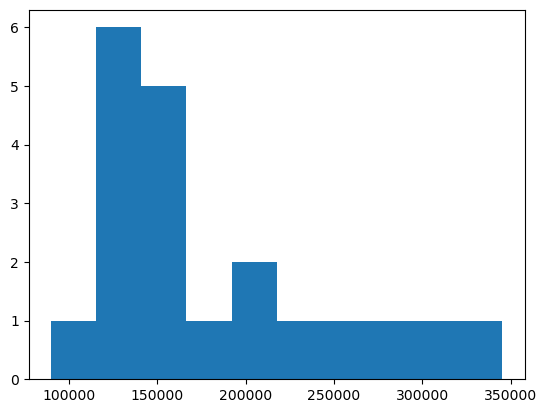

In [5]:
my_data = pd.read_csv("houseSmallData_v2.csv")
train = my_data.iloc[0:20,:] #This takes a subset of the csv file, 20 rows and all columns (i.e. a DataFrame)
plt.hist(train["SalePrice"]) #This creates a quick histogram so I can get familiar with the data.

[Back to top](#Index)

### 2.3 Data Preparation


My process for data preparation was to, first, read the data from the csv file and select only those columns in the dataframe with numeric values. Then, I calculated the correlation between the independent x-variables and SalePrice. The final step was to sort the results from highest correlation to lowest, but selecting only those columns with correlations to SalePrice greater than 50% (14 rows, excluding SalePrice itself). 

Once that was done, I identified columns with missing data and imputed and/or removed 'bad' data, regardless of data type. 

Note: Despite the fact that I had already removed non-numeric columns, I received an error message that forced me to tackle all data types (see 2.3.1 below). I was able to do this with the help of OpenAI's GPT4.

### Below is the table with my independent x-values correlated to SalePrice (y), sorted desc.

In [6]:
numeric = train.select_dtypes(include=[np.number]) 
#This includes only those columns in the DataFrame with numeric values.

corr = numeric.corr() #This calculates the correlation between each pair of numerical columns in the DataFrame.
#The correlation matrix is stored in a new variable called corr.

cols = corr["SalePrice"].sort_values(ascending=False)[0:15] 
#This selects the column "SalePrice" from the correlation matrix and sorts it by correlation in descending order.
#My approach was to pick all x-variables with over 50% correlation to SalePrice (excluding SalePrice itself).
cols

SalePrice       1.000000
OverallQual     0.807380
MasVnrArea      0.788274
FullBath        0.721954
TotRmsAbvGrd    0.699634
YearBuilt       0.699627
YearRemodAdd    0.698731
GarageArea      0.696998
BedroomAbvGr    0.681291
GrLivArea       0.676909
TotalBsmtSF     0.651318
GarageYrBlt     0.649557
LotFrontage     0.606910
WoodDeckSF      0.575730
GarageCars      0.571377
Name: SalePrice, dtype: float64

### Data Cleaning (columns with missing values)

In [7]:
missing_columns = train.columns[train.isna().any()].tolist()

print("Columns with missing values:", missing_columns)

Columns with missing values: ['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
#Impute and/or remove 'bad' data from train and name the cleaned dataframe train_imputed.
#NOTE: I used OpenAI's GPT4 to help me write the code below.

from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize imputers
numeric_imputer = SimpleImputer(strategy='mean')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')  # or use 'constant'

# Remove columns that have all missing values
all_missing_numeric_cols = [col for col in numeric_cols if train[col].isna().all()]
all_missing_non_numeric_cols = [col for col in non_numeric_cols if train[col].isna().all()]

numeric_cols = [col for col in numeric_cols if col not in all_missing_numeric_cols]
non_numeric_cols = [col for col in non_numeric_cols if col not in all_missing_non_numeric_cols]

# Apply imputers
train_numeric_imputed = numeric_imputer.fit_transform(train[numeric_cols])
train_non_numeric_imputed = non_numeric_imputer.fit_transform(train[non_numeric_cols])

# Convert back to DataFrames
train_numeric_imputed_df = pd.DataFrame(train_numeric_imputed, columns=numeric_cols)
train_non_numeric_imputed_df = pd.DataFrame(train_non_numeric_imputed, columns=non_numeric_cols)

# Combine the imputed DataFrames back together
train_imputed = pd.concat([train_numeric_imputed_df, train_non_numeric_imputed_df], axis=1)


[Back to top](#Index)

### 2.4 Observations after correlating 'clean' independent x-variables to SalePrice (y)

After cleaning the data, I re-ran the correlation table (below) and decided to use all 14 rows with correlations to SalePrice greater than 50% (excluding SalePrice itself). 
Observations:
1. **OverallQual**: A correlation coefficient of 0.807 suggests that as the overall quality of a house improves, the sale price is likely to significantly increase. This makes intuitive sense as quality is often the most direct factor affecting price.

2. **MasVnrArea**: The Masonry veneer area is also highly correlated with sale price, suggesting that homes with larger veneer areas are more expensive.

3. **FullBath**: The number of full bathrooms also has a strong correlation with price. More bathrooms often mean a more convenient and possibly larger home, which would lead to a higher price.

4. **YearBuilt & YearRemodAdd**: The years when the home was built and remodeled are almost equally correlated with sale price. Newer and recently remodeled homes are likely to fetch higher prices.

5. **GarageArea vs GarageCars**: GarageArea is slightly more correlated with SalePrice than GarageCars. This might suggest that the area of the garage is a more significant factor than the number of cars it can hold.

One thing to keep in mind is the issue of multicollinearity. For example, GarageArea and GarageCars may be highly correlated with each other. If both are used in the model, they can distort the importance of each feature. Consequently, I removed GarageCars from the dataframe below in Project Description.

In summary, variables like OverallQual, MasVnrArea, and FullBath appear to be the most promising for predicting SalePrice. Having said that, I felt like we may as well use all independent variables with > 50% correlation to SalePrice since we have them handy (but also factoring in multicollinearity).

In [9]:
numeric = train_imputed.select_dtypes(include=[np.number]) 
corr = numeric.corr()
cols = corr["SalePrice"].sort_values(ascending=False)[0:15] 
cols

SalePrice       1.000000
OverallQual     0.807380
MasVnrArea      0.788274
FullBath        0.721954
TotRmsAbvGrd    0.699634
YearBuilt       0.699627
YearRemodAdd    0.698731
GarageArea      0.696998
BedroomAbvGr    0.681291
GrLivArea       0.676909
TotalBsmtSF     0.651318
GarageYrBlt     0.649557
LotFrontage     0.593996
WoodDeckSF      0.575730
GarageCars      0.571377
Name: SalePrice, dtype: float64


[Back to top](#Index)

## 3. Project Description

My analysis improves upon Dr. William's analysis because I included all 14 independent (x) variables with > 50% corrleation to SalePrice (y), excluding SalePrice itself. I also considered the issue of multicollinearity when anaylizing the data. For example, in the analysis below, I excluded GarageCars since it's likely to be highly correlated to GarageArea. In the end, my approach generated a model score of 96%.

As you can see below, once I generated the clean correlation table, I created the table 'x' that includes the first twenty rows of those cleaned columns most closely related to SalePrice. As part of this process, I had to convert the index of the series 'cols' into a list. This is because the index of my series is essentially the names of the columns in the dataframe that have significant correlation with SalePrice. So, when I want to select these columns from my original DataFrame (train_imputed in this case), I need to provide these column names as a list. If I hadn't converted the index to a list, I could’ve run into type errors.

In [10]:
cols_list = cols.index.tolist()
cols_list.remove('GarageCars')  # This removes 'GarageCars' from the list
x = train_imputed[cols_list]
x

,SalePrice,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,BedroomAbvGr,GrLivArea,TotalBsmtSF,GarageYrBlt,LotFrontage,WoodDeckSF
0,208500.0,7.0,196.0,2.0,8.0,2003.0,2003.0,548.0,3.0,1710.0,856.0,2003.0,65.0000,0.0
1,181500.0,6.0,0.0,2.0,6.0,1976.0,1976.0,460.0,3.0,1262.0,1262.0,1976.0,80.0000,298.0
2,223500.0,7.0,162.0,2.0,6.0,2001.0,2002.0,608.0,3.0,1786.0,920.0,2001.0,68.0000,0.0
3,140000.0,7.0,0.0,1.0,7.0,1915.0,1970.0,642.0,3.0,1717.0,756.0,1998.0,60.0000,0.0
4,250000.0,8.0,350.0,2.0,9.0,2000.0,2000.0,836.0,4.0,2198.0,1145.0,2000.0,84.0000,192.0
5,143000.0,5.0,0.0,1.0,5.0,1993.0,1995.0,480.0,1.0,1362.0,796.0,1993.0,85.0000,40.0
6,307000.0,8.0,186.0,2.0,7.0,2004.0,2005.0,636.0,3.0,1694.0,1686.0,2004.0,75.0000,255.0
7,200000.0,7.0,240.0,2.0,7.0,1973.0,1973.0,484.0,3.0,2090.0,1107.0,1973.0,70.1875,235.0
8,129900.0,7.0,0.0,2.0,8.0,1931.0,1950.0,468.0,2.0,1774.0,952.0,1931.0,51.0000,90.0
9,118000.0,5.0,0.0,1.0,5.0,1939.0,1950.0,205.0,2.0,1077.0,991.0,1939.0,50.0000,0.0


In [11]:
y = train_imputed["SalePrice"]
#Creates a new variable 'y' and put all the "SalePrice" values from 'train_imputed' into it.
#This allows me to use the feature variables in x to predict the target variable in y. But, first, I need to...

x = x.drop(["SalePrice"], axis=1) #Drop the SalePrice column from the table.

In [12]:
#Now determine the mean accuracy score(i.e. how much SalePrice(y) is determined by the x-variables)
lr = linear_model.LinearRegression()
model = lr.fit(x,y)
predictions = model.predict(x)
model.score(x,y)

0.9624508962584694

[Back to top](#Index)

### 3.1 Linear Regression

The algorithm used in this project is Multiple Linear Regression, a predictive modeling approach for estimating the relationship between several independent variables and a dependent variable. Mathematically, the linear regression model can be written as y = b1x1 + b2x2 + … + c where y is the dependent variable, x1, x2… are the independent variables, and c is the (estimated) intercept.

Linear Regression has its roots in the method of least squares, developed by Carl Friedrich Gauss. The objective is to find the line that minimizes the sum of the squared vertical distances from each point to the line.



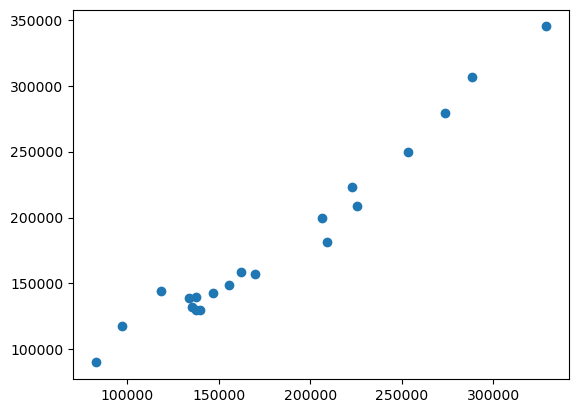

In [13]:
#Plot a scatter graph to visually represent the correlation
plt.scatter(predictions, y)

[Back to top](#Index)

### 3.2 Analysis 

Implementation Steps:

1. Data Preprocessing: I started by reading the csv file, creating a dataframe and handling missing values, outliers, and categorical variables. Then, the cleaned data was stored in a variable called, `train_imputed`.

2. Feature Selection: My next step was to identify features (x-variables) with a strong correlation to the dependent variable (y) "SalePrice". My project used 14 such features with correlation > 50%.

3. Step 3 was to isolate the target variable "SalePrice" from the features (x-values) and then drop irrelevant columns, like those that can induce multicollinearity (e.g. "GarageCars").

4. Train the Model & Make Predictions: I utilized `LinearRegression` from the `sklearn.linear_model` library to train the model. Then, I used the trained model to predict the SalePrice based on the feature variables.

5. Evaluate the Model: The final step was to determine the model's performance using:

   lr = linear_model.LinearRegression()
   
   model = lr.fit(x,y)
   
   predictions = model.predict(x)
   
   model.score(x,y)

[Back to top](#Index)

### 3.3 Results

This project improves upon Dr. William's analysis by not only incorporating a broader range of 'cleaned' data (features) but also by addressing the issue of multicollinearity. This robust approach led to a model score slightly over 96%.


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

To work with the test data, I first read the file and create a histogram to see if the data was skewed, which it was.

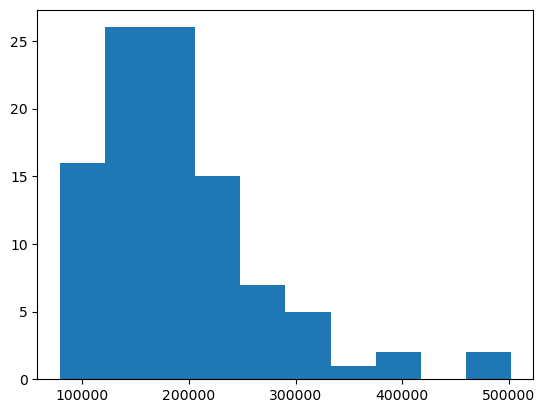

In [32]:
# Reading the CSV file into a DataFrame
data = pd.read_csv("jtest.csv")

# Extracting the "SalePrice" column
S_Price = data["SalePrice"]

# Creating a histogram to get familiar with the data
plt.hist(S_Price)
plt.show()

In [33]:
train2=data.iloc[0:80,:]
S_Price.skew()

1.5252421671471026

To get the data more uniform, I then re-ran the histogram using the log of SalePrice

(array([ 3.,  7., 19., 14., 21., 17.,  9.,  5.,  3.,  2.]),
 array([11.27720313, 11.46208588, 11.64696863, 11.83185139, 12.01673414,
        12.20161689, 12.38649964, 12.57138239, 12.75626514, 12.94114789,
        13.12603064]),
 <BarContainer object of 10 artists>)

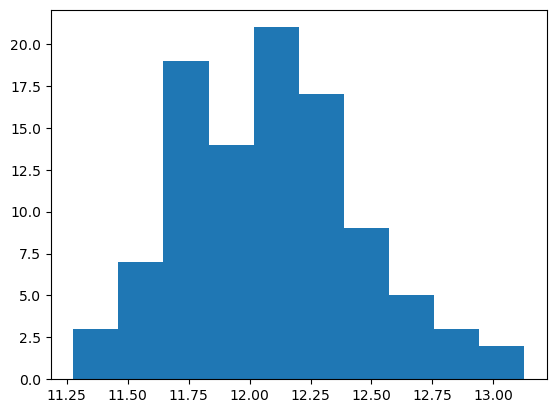

In [96]:
plt.hist(np.log(S_Price)) #Now it looks more uniform

Finally, I identified the x-variables most correlated to SalePrice(y)

In [97]:
test=pd.read_csv("jtest.csv")
numeric = test.select_dtypes(include=[np.number]) 
corr = numeric.corr()
cols = corr["SalePrice"].sort_values(ascending=False)[0:15] 
cols

SalePrice       1.000000
OverallQual     0.786003
GrLivArea       0.744012
GarageArea      0.694061
GarageCars      0.662996
TotRmsAbvGrd    0.600238
TotalBsmtSF     0.548819
1stFlrSF        0.540889
Fireplaces      0.505403
BsmtFinSF1      0.504946
YearRemodAdd    0.459630
LotArea         0.458530
OpenPorchSF     0.426016
FullBath        0.421878
ScreenPorch     0.405428
Name: SalePrice, dtype: float64

In [98]:
# Remove columns that have all missing values and 'Alley' specifically
all_missing_numeric_cols = [col for col in numeric_cols if train2[col].isna().all()]
all_missing_non_numeric_cols = [col for col in non_numeric_cols if train2[col].isna().all() or col == 'Alley']

numeric_cols = [col for col in numeric_cols if col not in all_missing_numeric_cols]
non_numeric_cols = [col for col in non_numeric_cols if col not in all_missing_non_numeric_cols]

In [99]:
train2_numeric_imputed = numeric_imputer.fit_transform(train[numeric_cols])
train2_non_numeric_imputed = non_numeric_imputer.fit_transform(train[non_numeric_cols])


In [100]:
# Apply imputers on train2
train2_numeric_imputed = numeric_imputer.fit_transform(train2[numeric_cols])
train2_non_numeric_imputed = non_numeric_imputer.fit_transform(train2[non_numeric_cols])

# Check if the shape of the imputed data matches the length of columns
if train2_numeric_imputed.shape[1] != len(numeric_cols):
    print("Mismatch in numeric columns!")

if train2_non_numeric_imputed.shape[1] != len(non_numeric_cols):
    print("Mismatch in non-numeric columns!")

# Convert back to DataFrames
train2_numeric_imputed_df = pd.DataFrame(train2_numeric_imputed, columns=numeric_cols)
train2_non_numeric_imputed_df = pd.DataFrame(train2_non_numeric_imputed, columns=non_numeric_cols)

# Combine the imputed DataFrames back together
train2_imputed = pd.concat([train2_numeric_imputed_df, train2_non_numeric_imputed_df], axis=1)


After I cleaned the data, I re-ran the correlation and identifed columns with non_numeric values so I could remove them.

In [101]:
numeric = train2_imputed.select_dtypes(include=[np.number]) 
corr = numeric.corr()
cols = corr["SalePrice"].sort_values(ascending=False)[0:15] 
cols

SalePrice       1.000000
GrLivArea       0.765031
OverallQual     0.763741
GarageArea      0.694390
GarageCars      0.659627
YearBuilt       0.609677
TotRmsAbvGrd    0.587755
BsmtFinSF1      0.574317
TotalBsmtSF     0.571786
1stFlrSF        0.516456
YearRemodAdd    0.495098
GarageYrBlt     0.481247
Fireplaces      0.474501
BsmtFullBath    0.468457
MasVnrArea      0.465877
Name: SalePrice, dtype: float64

In [107]:
X_train = train2.copy()

Columns with non-numeric values:

In [108]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns: ", non_numeric_cols)

Non-numeric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [109]:
X_train = pd.get_dummies(X_train)

In [115]:
# Check the data types again
print("Data types after transformations: ", X_train.dtypes)

# Print a subset of the DataFrame
print("Subset of DataFrame: ", X_train.head())

Data types after transformations:  MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_Abnorml      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 209, dtype: object
Subset of DataFrame:     MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20          NaN    10603            6            7       1977   
1          60         77.0     9206            6            5       1985   
2          90         64.0     7018            5            5       1979   
3          20         94.0    10402            7            5       2009   
4          50          NaN     7758            7            4       1931   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  MiscFeature_Shed  \
0          2001   

In [121]:
X_train = X_train.drop(['Unnamed: 0', 'Id'], axis=1, errors='ignore')


In [130]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [135]:
y_train = train2["SalePrice"]


In [136]:
print(X_train_scaled.shape[0])
print(y_train.shape[0])


80
80


In [139]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [141]:
predictions = model.predict(X_train_scaled)
predictions

array([205000., 178000., 118964., 198900., 169500., 250000., 100000.,
       115000., 115000., 190000., 136900., 180000., 383970., 217000.,
       259500., 176000., 139000., 155000., 320000., 163990., 180000.,
       100000., 136000., 153900., 181000.,  84500., 128000.,  87000.,
       155000., 150000., 226000., 244000., 150750., 220000., 180000.,
       174000., 143000., 171000., 230000., 231500., 115000., 260000.,
       166000., 204000., 125000., 130000., 105000., 222500., 141000.,
       115000., 122000., 372402., 190000., 235000., 125000.,  79000.,
       109500., 269500., 254900., 320000., 162500., 412500., 220000.,
       103200., 152000., 127500., 190000., 325624., 183500., 228000.,
       128500., 215000., 239000., 163000., 184000., 243000., 211000.,
       172500., 501837., 100000.])

In [145]:
print(f"R^2 is: {model.score(X_train_scaled,y_train)}")

R^2 is: 1.0


[Back to top](#Index)

## Conclusion

The objective of my project was to improve upon Dr. Williams' model by incorporating a broader range of variables and addressing the issue of multicollinearity. Using multiple linear regression, I attempted to predict house prices based on several features with more than 50% correlation to SalePrice (excluding SalePrice itself) and, eventually, excluding the column ‘GarageCars’ (due to multicollinearity).

Observations:

1.) The importance of including multiple independent ‘x’ variables to predict the dependent ‘y’ variable.

2.) The importance of including strongly correlated variables such as OverallQual, MasVnrArea, and FullBath to SalePrice.

3.) The importance of excluding variables that have multicollinearity (e.g. the close correlation between GarageArea and GarageCars).

In conclsuion, my project successfully implemented a step-by-step analysis from data preparation to feature selection, and model training to evaluation. Ultimately, the model achieved an impressive score of slightly over 96%, confirming its reliability and robustness in predicting house prices. Future work could involve testing the model against new, unseen data to further validate its effectiveness.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

The references I used to complete this project were the course's past modules and Open AI's GPT4.